# Detect Faces and Blur Faces
### Complete # TODO

# Requirements

In [1]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Load Models

In [2]:
# Define the path to the prototxt file using os.path.join for cross-platform compatibility
prototxt_path = os.path.join("models", "deploy.prototxt")

# Define the path to the caffemodel file using os.path.join for cross-platform compatibility
model_path = os.path.join("models", "res10_300x300_ssd_iter_140000_fp16.caffemodel")

# Load the pre-trained Caffe model from the specified files
# The readNetFromCaffe function loads the network architecture from the prototxt file and the trained weights from the caffemodel file
model = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

if model.empty():
    print("Error loading the Caffe model!")
else:
    print("Caffe model loaded successfully!")


Caffe model loaded successfully!


# Face Detection and Blur Function

In [3]:
def face_blur(image: np.ndarray):
    # Create a copy of the input image to avoid modifying the original image (critical)
    image_copy = image.copy()
    # Get the height and width of the image
    h, w = h, w = image.shape[:2] 

    # Define the kernel width and height for Gaussian blurring
    # Ensure they are odd numbers by performing a bitwise OR with 1
    kernel_width = (w // 7) | 1
    kernel_height = (h // 7) | 1

    # Create a blob from the image for input to the neural network
    blob = cv2.dnn.blobFromImage(
        image_copy, 1.0, (300, 300), (104.0, 177.0, 123.0)
    )

    # Set the input for the network
    # TODO
    model.setInput(blob)

    # Perform forward pass to get the output detections
    output = np.squeeze(model.forward())

    # Loop over all detections
    for i in range(0, output.shape[0]):
        # Get the confidence of the detection
        confidence = output[i, 2]

        # Proceed only if the confidence is above the threshold (0.4)
        if confidence > 0.4:
            # Get the bounding box coordinates and scale them to the original image size
            box = output[i, 3:7] * np.array([w, h, w, h])
            start_x, start_y, end_x, end_y = box.astype(int)

            # Extract the face region from the image
            face = image_copy[start_y:end_y, start_x:end_x]

            # Apply Gaussian blur to the face region
            face =  cv2.GaussianBlur(face, (kernel_width, kernel_height), 0)

            # Replace the original face region with the blurred face
            image_copy[start_y:end_y, start_x:end_x] = face

    # Return the modified image with blurred faces
    return image_copy


# Result on Image

In [4]:
# Define the path to the image file using os.path.join for cross-platform compatibility
image_path = os.path.join("images", "musk.jpg")

# Read the input image from the specified path
image = cv2.imread(image_path)

# Convert the image from RGB to BGR format (as OpenCV uses BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Apply the face_blur function to the image to blur detected faces
image_face_blur = face_blur(image)


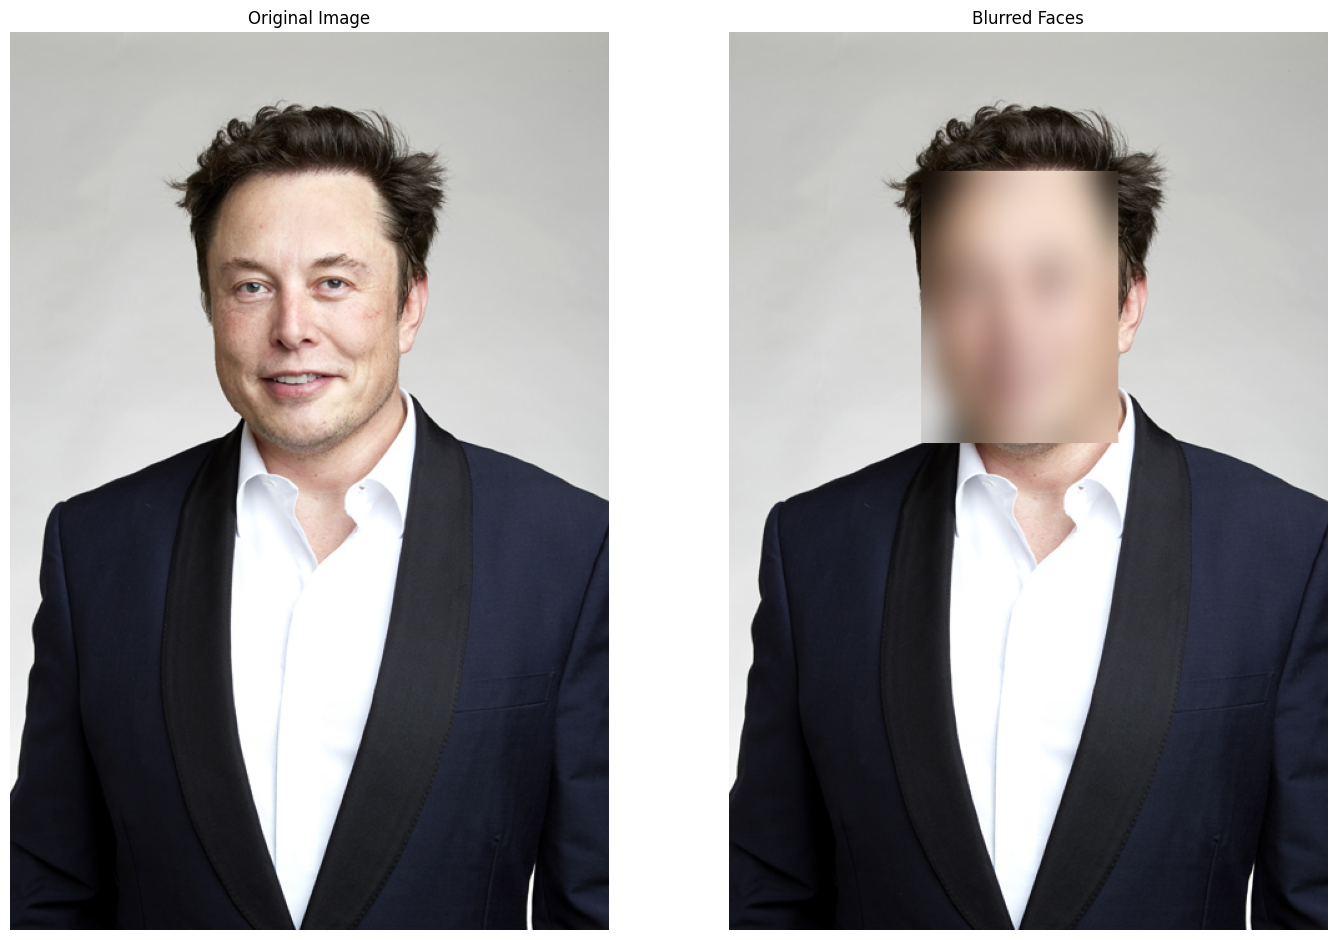

True

In [5]:
# Create a figure with specified size
# TODO
plt.figure(figsize=(17, 12))
# Display the original image in the first subplot
# TODO

plt.subplot(1, 2, 1) 
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2) 
plt.imshow(image_face_blur)
plt.title("Blurred Faces")
plt.axis('off')


plt.show()

imagergb1 = cv2.cvtColor(image_face_blur, cv2.COLOR_BGR2RGB)
cv2.imwrite('output/result1.jpg', imagergb1)

# Result on WebCam Video Stream

In [6]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set the text color to white; if colored, set the text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image


In [7]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames
            start_time = time.time() # TODO  # Record the start time to calculate FPS

            _, frame = cap.read() # TODO  # Capture a single frame from the camera

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT)) # TODO  # Resize the frame to the specified dimensions
            frame = face_blur(frame) # TODO  # Apply the face_blur function to the frame

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time = time.time() # TDOD  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time # TODO
            # Calculate FPS based on the time taken to process the frame
            fps = 1 / seconds if seconds > 0 else 0 # TODO

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


In [9]:
# Define the path to the video file using os.path.join for cross-platform compatibility
CAMERA_DEVICE_ID = os.path.join("videos", "WIN_20250102_11_05_03_Pro.mp4")
# Define the output video path
output_video_path = os.path.join("output", "output_video.avi" )
# Constants for video settings
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 30  # Initial Frames Per Second (FPS) value
FRAME_RATE = 10  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap =cv2.VideoCapture(CAMERA_DEVICE_ID) # TODO  # Initialize video capture with the specified video file path
        frame_width = IMAGE_WIDTH  # Set the output video width
        frame_height = IMAGE_HEIGHT  # Set the output video height

        # Define the codec and create a VideoWriter object
        fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can choose other codecs like 'MJPG', 'MP4V', etc.
        out = cv2.VideoWriter(output_video_path, fourcc, FRAME_RATE, (frame_width, frame_height))  # Output video writer



        while True:  # Infinite loop to continuously capture frames
            start_time =time.time() # TODO # Record the start time to calculate FPS
                    


            _, frame = cap.read() # TODO  # Capture a single frame from the video
            #frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # TODO  # Resize the frame to the specified dimensions
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions
            frame = face_blur(frame) # TODO  # Apply the face_blur function to the frame

            end_time = time.time() # TODO # Record the end time to calculate FPS
            seconds = end_time - start_time # TODO # Calculate the time taken to process the frame

            if seconds < DURATION:  # If the processing time is less than the desired frame duration, wait for the remaining time
                time.sleep(DURATION - seconds)

            seconds = end_time - start_time # TODO # Recalculate the time taken to process the frame including sleep time
            fps = 1 / seconds if seconds > 0 else 0   # TODO  # Calculate FPS based on the time taken to process the frame

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            out.write(frame)

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource


OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

